## Assignment 4
    1. Name: Digambar Chaure
    2. Batch: P-10
    3. Roll No.: 43216
    
   ### Problem Statement :
     ECG Anomaly detection using Autoencoders

#### a. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


#### b. Upload / access the dataset

In [2]:
PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


#### Finding shape of the dataset

In [3]:
data.shape

(4998, 141)

#### Splitting training and testing dataset

In [4]:
features = data.drop(140, axis=1)
target = data[140]
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]


#### Scaling the data using MinMaxScaler

In [5]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

#### c. Encoder converts it into latent representation 
#### d. Decoder networks convert it back to the original input
#### Creating autoencoder subclass by extending Model class from keras

In [6]:
class AutoEncoder(Model):
  def __init__(self, output_units, ldim=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(ldim, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

#### e. Compile the models with Optimizer, Loss, and Evaluation Metrics
#### Model configuration

In [7]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer='adam')
epochs = 20

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
5/5 [==============================] - 8s 296ms/step - loss: 0.0106 - mse: 0.0236 - val_loss: 0.0131 - val_mse: 0.0301
Epoch 2/20
5/5 [==============================] - 0s 58ms/step - loss: 0.0104 - mse: 0.0230 - val_loss: 0.0129 - val_mse: 0.0298
Epoch 3/20
5/5 [==============================] - 0s 42ms/step - loss: 0.0098 - mse: 0.0218 - val_loss: 0.0126 - val_mse: 0.0292
Epoch 4/20
5/5 [==============================] - 0s 56ms/step - loss: 0.0089 - mse: 0.0197 - val_loss: 0.0126 - val_mse: 0.0291
Epoch 5/20
5/5 [==============================] - 0s 51ms/step - loss: 0.0079 - mse: 0.0175 - val_loss: 0.0125 - val_mse: 0.0288
Epoch 6/20
5/5 [==============================] - 0s 76ms/step - loss: 0.0070 - mse: 0.0155 - val_loss: 0.0119 - val_mse: 0.0276
Epoch 7/20
5/5 [==============================] - 0s 71ms/step - loss: 0.0063 - mse: 0.0140 - val_loss: 0.0118 - val_mse: 0.0273
Epoch 8/20
5/5 [==============================] - 0s 49ms/step - loss: 0.0059 - mse: 0.0130 - va

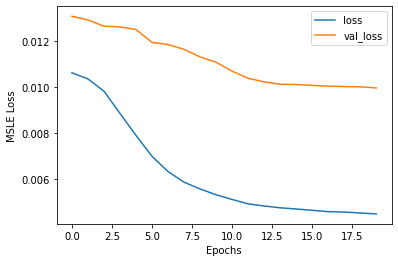

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

#### Finding threshold for anomaly and doing predictions

In [9]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) \
   + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")


73/73 [==============================] - 1s 5ms/step
Threshold: 0.009919859320797034


#### Getting accuracy score

In [10]:
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

32/32 [==============================] - 0s 4ms/step


0.928